##### <a id='top'></a>

# Homework 4: Confidence intervals and other things
***

**Name**: Andrew Pickner

***

This assignment is due on Moodle by **11:59 PM on Friday November 8**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Are sea-levels changing?

You have been contacted by the local government of New York City, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file (posted on Canvas).

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save NYC and the Statue of Liberty from a watery fate?

In [3]:
# Local and web paths to the data; pick which works for you.
filepath = "/Users/AndrewMacbook/Downloads/sealevel_newyork.csv"

dfSL = pd.read_csv(filepath, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head(100000)

,Year,Month,Day,SL
0,1920,6,2,1593
1,1920,6,3,1605
2,1920,6,4,1617
3,1920,6,5,1779
4,1920,6,6,1722
...,...,...,...,...
35272,2016,12,27,1753
35273,2016,12,28,1647
35274,2016,12,29,1896
35275,2016,12,30,1710


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [4]:
'''
1: take in a single argument: check (already done for me).
2: idk if I was supposed to look through the data, but I did (using quicklook on my mac) and the missing sea level 
data value appears to be -32,767. I also used the min and max functions below after I did this to make sure that 
these were in fact the fill values. I will replace these values with NaN using the dataframe replace method.
3: Now I will use the dropna method w/ the default parameters dropping rows if any value is NaN.
4: I then only include rows for the second day of the month using a nifty lil method.
5: return the cleaned df: check (already done for me).
'''
dfMin = min(dfSL['SL'])
dfMax = max(dfSL['SL'])
print('min value of the df: {},'.format(dfMin), 'max value of the df: {}'.format(dfMax))

def clean_data(df):
    # your code goes here!
    fill_value = min(df['SL'])
    replacedDf = df.replace(to_replace=fill_value, value=np.nan)
    droppedDf = replacedDf.dropna()
    cleanDf = droppedDf[droppedDf.Day == 2]
    return cleanDf

dfClean = clean_data(dfSL)
dfClean.head(600)

min value of the df: -32767, max value of the df: 3126


,Year,Month,Day,SL
0,1920,6,2,1593.0
30,1920,7,2,1710.0
61,1920,8,2,1662.0
92,1920,9,2,1585.0
122,1920,10,2,1521.0
...,...,...,...,...
20333,1976,2,2,1414.0
20362,1976,3,2,1869.0
20393,1976,4,2,1813.0
20423,1976,5,2,1849.0


In [5]:
len(dfClean)

1003

**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 1 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 


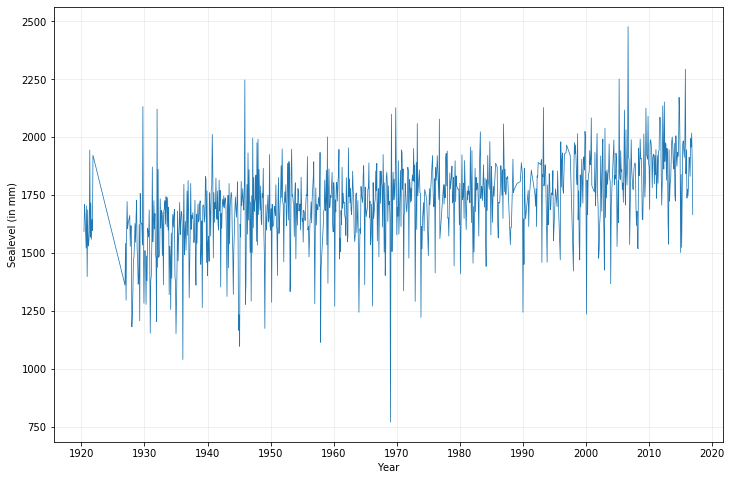

In [6]:
'''
FROM WEB:
    from pandas.tseries import converter
    converter.register()
FROM ERROR:
    /usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

    To register the converters:
    >>> from pandas.plotting import register_matplotlib_converters
    >>> register_matplotlib_converters()
    warnings.warn(msg, FutureWarning)

'''
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import datetime, time

dfClean['Date'] = pd.to_datetime(dfClean[['Year', 'Month', 'Day']])

# kinda just a random test for the axes but I got that working a different way
# dfClean['Date2'] = dfClean['Date'].apply(lambda r: r - datetime.timedelta(1))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.plot(dfClean['Date'], dfClean['SL'], lw=0.75)

ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel('Year')
ax.set_ylabel('Sealevel (in mm)')

x_ticks = [datetime.date(year, 1, 1) for year in range(1920, 2030, 10)]
x_labels = [year for year in range(1920, 2030, 10)]

'''
So now the x_ticks are in the correct location with the correct labels
'''
loc, lab = plt.xticks(x_ticks, x_labels)

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each of the two decades of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

In [7]:
# to include row within a date range, here are the dates that we want included
start_date1 = '1986-01-01'
end_date1 = '1996-01-01'

# the first line is the actual method to get these row inside the range
twentieth_centuryDf = dfClean[dfClean["Date"].isin(pd.date_range(start_date1, end_date1))]
twentieth_centuryDf.head()

,Year,Month,Day,SL,Date
23955,1986,1,2,1628.0,1986-01-02
23986,1986,2,2,1565.0,1986-02-02
24014,1986,3,2,1719.0,1986-03-02
24045,1986,4,2,1715.0,1986-04-02
24075,1986,5,2,1723.0,1986-05-02


In [8]:
# to include row within a date range, here are the dates that we want included
start_date2 = '2006-01-01'
end_date2 = '2016-01-01'

# the first line is the actual method to get these row inside the range
twenty_first_centuryDf =  dfClean[dfClean["Date"].isin(pd.date_range(start_date2, end_date2))]
twenty_first_centuryDf.head()

,Year,Month,Day,SL,Date
31260,2006,1,2,1869.0,2006-01-02
31291,2006,2,2,2117.0,2006-02-02
31319,2006,3,2,1831.0,2006-03-02
31350,2006,4,2,1707.0,2006-04-02
31380,2006,5,2,2032.0,2006-05-02


The mean of the 1986-1995 data is: 1747.6052631578948, The mean of the 2006-2015 data is: 1879.1666666666667
Difference is: +131.56140350877195 mm


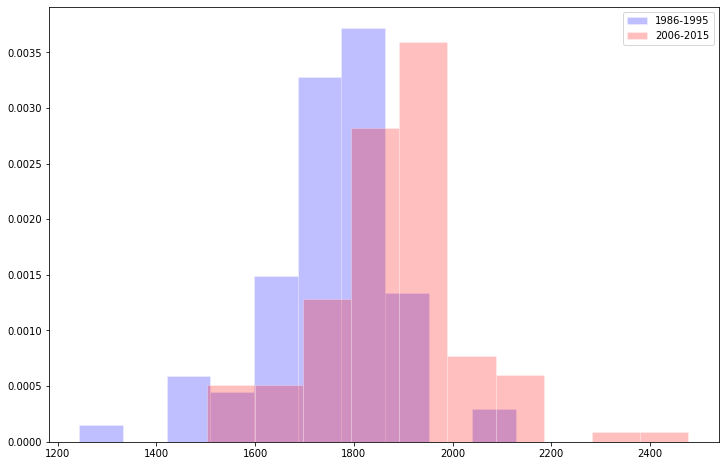

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.hist(twentieth_centuryDf["SL"], color="blue", edgecolor="white", density=True, alpha=0.25, label='1986-1995')
plt.hist(twenty_first_centuryDf["SL"], color="red", edgecolor="white", density=True, alpha=0.25, label='2006-2015')
_ = plt.legend()

mean1 = np.mean(twentieth_centuryDf["SL"])
mean2 = np.mean(twenty_first_centuryDf["SL"])
print('The mean of the 1986-1995 data is: {},'.format(mean1), 'The mean of the 2006-2015 data is: {}'.format(mean2))
print('Difference is: +{} mm'.format(mean2-mean1))

---
So now that we have this plot in front of us and I've also taken the liberty to print out the mean for each decade's distribution, we can compare the two decades sealevels. For starters, it appears that the average sealevel is higher in the more recent decade by $131.56140350877195$ mm. $H_0$ would be that there is no difference in the two means. This leads me to construct $H_1$: The mean sealevels is higher in the more recent decade.

More formally:

$H_0 : \mu_{1986-1995} = \mu_{2006-2015} \Rightarrow H_0 : \mu_{1986-1995} - \mu_{2006-2015} = 0$ 

$H_1 : \mu_{1986-1995} \lt \mu_{2006-2015} \Rightarrow H_1 : \mu_{1986-1995} - \mu_{2006-2015} > 0$

*Note:* I initially thought that the alternative hypothesis is just that the two means are unequal, but given what the data has pointed to thus far (and my guess that climate change has indeed caused the sealevels to be rising) indicate an assumption I've made that the mean in the more recent decade will not only be different but it will be higher than the other mean.

*2nd Note:* On reconsideration, because we weren't specified to take a single tailed test, I do believe that the null hypothesis should just be that the two means are unequal (plus I feel more confident taking a two tailed test). We can use the results of the later parts to determine if the means are unequal, and we can use these results in conjucntion with our histogram in this part to make a conlclusion about the direction of difference.

So ultimately:

$H_0 : \mu_{1986-1995} = \mu_{2006-2015} \Rightarrow H_0 : \mu_{1986-1995} - \mu_{2006-2015} = 0$ 

$H_1 : \mu_{1986-1995} \neq \mu_{2006-2015} \Rightarrow H_1 : \mu_{1986-1995} - \mu_{2006-2015} \neq 0$

---

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

In [10]:
# the mean from the decade 1986-1995
n1 = len(twentieth_centuryDf["SL"])
sample_mean1 = sum(twentieth_centuryDf["SL"]) / n1

deg_free1 = n1 - 1

# kinda hacked the name of this var with the letter O
n2 = len(twenty_first_centuryDf["SL"])
sample_mean2 = sum(twenty_first_centuryDf["SL"]) / n2

deg_free2 = n2 - 1

print("Number of data points in the decade 1986-1995: {0:.4f}".format(n1))
print("Number of data points in the decade 2006-2015: {0:.4f}".format(n2))

print("Sample mean for the decade 1986-1995: {0:.4f}".format(sample_mean1))
print("Sample mean for the decade 2006-2015: {0:.4f}".format(sample_mean2))

svar1 = sum((x-sample_mean1)**2 for x in twentieth_centuryDf['SL']) / (n1-1)

svar2 = sum((x-sample_mean2)**2 for x in twenty_first_centuryDf['SL']) / (n2-1)

print("Sample variance for the decade 1986-1995: {0:.4f}".format(svar1))
print("Sample variance for the decade 2006-2015: {0:.4f}".format(svar2))

sstd1 = np.sqrt(svar1)

sstd2 = np.sqrt(svar2)

print("Sample standard deviation for the decade 1986-1995: {0:.4f}".format(sstd1))
print("Sample standard deviation for the decade 2006-2015: {0:.4f}".format(sstd2))

def get_t_crit(conf_level, df):
    return stats.t.ppf((1-((1-conf_level)/2)), df)

def get_z_crit(conf_level):
    return stats.norm.ppf(1-((1-conf_level)/2))

t_crit1 = get_t_crit(0.999, deg_free1)
print("The t-crit value for the decade 1986-1995: {0:.4f}".format(t_crit1))

t_crit2 = get_t_crit(0.999, deg_free2)
print("The t-crit value for the decade 2006-2015: {0:.4f}".format(t_crit2))

z_crit1 = get_z_crit(0.999)
print("The z-crit value for the decade 1986-1995: {0:.4f}".format(z_crit1))

z_crit2 = get_z_crit(0.999)
print("The z-crit value for the decade 2006-2015: {0:.4f}".format(z_crit2))

Number of data points in the decade 1986-1995: 76.0000
Number of data points in the decade 2006-2015: 120.0000
Sample mean for the decade 1986-1995: 1747.6053
Sample mean for the decade 2006-2015: 1879.1667
Sample variance for the decade 1986-1995: 19281.2288
Sample variance for the decade 2006-2015: 23361.7535
Sample standard deviation for the decade 1986-1995: 138.8569
Sample standard deviation for the decade 2006-2015: 152.8455
The t-crit value for the decade 1986-1995: 3.4250
The t-crit value for the decade 2006-2015: 3.3742
The z-crit value for the decade 1986-1995: 3.2905
The z-crit value for the decade 2006-2015: 3.2905


---
*Note:* I realize we use the CLT to justify using the normal distribution in a lot of the slides and in class, but it seems silly using $z^*$ instead of $t^*$. For the sake of this, I will build two sets of intervals and distinguish between the two.

We will have to use the sample variance from each sample to compute this confidence interval so that will be a good place to start...

Generally the variance for a sample can found using the following formula (where $s^2$ is the sample variance):

$s^2 = \frac{\Sigma \left(x_i-\bar{x}\right)^2}{n-1}$

Which gives us our sample standard deviation: 

$s = \sqrt{\frac{\Sigma \left(x_i-\bar{x}\right)^2}{n-1}}$

Where $n=$ sample size, $x_i$ is each data point in the sample, and $\bar{x}$ is the sample mean. 

Because there is so much data I used Python to handle the calculations using the formula above.

Also, because the population variance and standard deviation are unknown we'll use the sample variance and standard deviation, which means that the $z^*$ turns into $t^*$ because we have to pull from the t-distribution rather than the normal distribution. We use the $\chi^2$ distribution to pull our $t^*$, and then we use the sample parameters rather than the population parameters.

---

**(1)** 

From my python calculations, the mean sealevel for the 1986-1995 decade is $1747.6$ which I obtained by taking the number of data points using `len()` and the sum of the data points using the builtin `sum()` function, and then I divided the sum of all the data points by the number of points. 

To find the variance, I subtracted each data point ($x_i$) from the datasets mean ($\bar{x}$) and then I squared this, took the sum of these squared differences and finally divided by the length of the dataset minus $1$. 

Finally, I used the `np.sqrt()` method to find the standard deviation by using it on the variance.

One last note, there are $76$ data points in this decade.

I also wrote a python function `get_t_crit(conf_level, df)` that returns the positive $z^*$ value based on the confidence level and degrees of freedom (also assuming a two tailed test). With the input $0.999$, my function output: $2.6430$. I double checked [this website here](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf) to make sure my function was correct (and it is).

I also did this for finding $z^*$ for that interval as well.

To find my confidence interval, I must find the margin-of-error, and the margin of error is given by:

margin-of-error $ = t^* \frac{\sigma}{\sqrt{n}}$

margin-of-error with $z^*$ is $ = z^* \frac{\sigma}{\sqrt{n}}$

But since we don't know the population variance, we will use the sample variance to arrive at our sample standard deviation:

$s = 138.9$

This means our margin of error is:

margin-of-error with $t^* = 3.4250 \frac{138.9}{\sqrt{76}} = 54.5533$

margin-of-error with $z^* = 3.2905 \frac{138.9}{\sqrt{76}} = 52.4110$

Both of the intervals with $t^*$ and $z^*$ are incredibly similar...

Which means our confidence interval is:

$\bar{x} \pm$ margin-or-error

**Interval with $t^*$:** $[1693.0520, 1802.1586]$

**Interval with $z^*$:** $[1695.1943, 1800.0163]$

Both intervals are incredibly close even with rounding so this proves to me that the z-critical value is a good enough estimate.

---

**(2)**

I used the exact same methods of computation in python to obtain a sample mean of $1879.2$ for the decade of 2006-2015. The variance is $23361.8$, and the standard deviation is $152.8$. Lastly, the number of data points in this decade is $120$.

Also, I'm not relisting all of the equations from the previous interval, but here is what I've got:

$s = 152.8$

This means our margin of error is:

margin-of-error with $z^* = 3.2905 \frac{152.8}{\sqrt{120}} = 45.8981$

Which means our confidence interval is:

$\bar{x} \pm$ margin-or-error

$1879.1 \pm 45.8981$

$[1,833.2019, 1,924.9981]$

Since I showed myself that the z-crit and t-crit values don't matter quite as much, I will use the z-critical value moving forward (*Note:* I've already completed a lot of the assignment trying to find the appropriate distribution, but this was a good lesson IMO.)

---

**Conclusion:**

From the two confidence intervals the overlap seems rather small in comparison to both of the intervals sizes so I would say from these tests alone, that there is probably a very high likelihood of there being a difference in means from the two samples is high. Had we taken a confidence level at a lower level we'd see less overlap for sure (I suppose the tradeoff is being less sure that the mean falls within that interval...). We would probably want to perform this test *and* the test in the next part to form a more complete picture of the data. (The test in the next method might prove to far more useful than this)

---

**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

In [11]:
z_critical = get_z_crit(0.999)
print("z* = {0:.4f}".format(z_critical))

z* = 3.2905


---
*Note:* I used the python cell from part D. to get all of my values, I felt it a bit redundant to include it twice.

From the class slides, a confidence interval for the difference of means in two samples can be computed simply by:

$\bar{X} - \bar{Y} \pm z_{\alpha/2}\sqrt{\frac{s_X^2}{n_X} + \frac{s_Y^2}{n_Y}}$

Because we are taking a 99.9% CI, $\alpha = 0.001$ so $z^*$ is $z_{0.0005}$

In terms of this problem, I will consider X to be the sample from the decade 2006-2015 and Y to be the sample from 1986-1995. We already have the sample means, sample variances, and sample sizes so now we just need the z-critical value. I used the function I devised in the parts above to compute this value.

I'll list all of the variables I'm about to use:

$z^* = 3.2905$

$\bar{X} = 1879.1667$

$\bar{Y} = 1747.6053$

$\bar{X} - \bar{Y} = 1879.1667 - 1747.6053 = 131.5614$

$s_X^2 = 23361.7535$

$s_Y^2 = 19281.2288$

$n_X = 120$

$n_Y = 76$

So our interval is given by:

$1879.1667 - 1747.6053 \pm 3.2905 \sqrt{\frac{23361.7535}{120} + \frac{19281.2288}{76}}$

$131.5614 \pm 3.2905 \sqrt{1168.0877 + 253.7003}$

$131.5614 \pm 3.2905 \sqrt{1421.7880}$

$131.5614 \pm 3.2905 (37.7066)$

$131.5614 \pm 124.0735$

So our interval is: 

$[7.4879, 255.6349]$

---
**Conclusion:** Based on our CI's from part D, we had intervals that barely overlapped each other which indicates there is not a very high likelihood of their means being the same just from intuition. Because $H_0$ was: the means from the two samples are the same, and because $0$ is not found within our interval, we can conclude from our CI that we should in fact reject the null hypothesis for our alternative. Furthermore, because our interval was all positive, we can even conclude that our alternative hypothesis is: $H_1 : \mu_{1986-1995} \lt \mu_{2006-2015} \Rightarrow \mu_{1986-1995} - \mu_{2006-2015} > 0$, and as one can tell from the previous three problems, this is extremely likely true.


---

**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

---
Well each data point would have to be independent of each other and I feel like if we take more than one data point per month the second value recorded each month will be dependent on the previous data point (I believe trivially...?) which violates the Independence assumption of the CLT which states that each of the sample values must be independent of each other.

---

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Waiting for the Bus

You are waiting for the bus, and are rather impatient.
Your friend tells you that busses arrive according to an exponential distribution with parameter $\lambda=1/10$ (busses/min) for a *mean* waiting time of 10 minutes.  You've been waiting for a while, and want to prove their hypothesis wrong: you're thinking the wait is longer than that (one-tailed).
		
(Note: You may use the approximation $e^3\approx20$ when applicable on this problem.  You may do calculations in Python if you wish, but all exposition should be in markdown.)

**Part A:** State the null and alternative hypotheses being tested.

---
$H_0 : \mu \leq 10$

$H_1 : \mu \gt 10$

These would be our hypothesis because we want to either accept or reject our null, which will either show support for our alternative hypothesis or not. Our hypothesis is that the bus will take longer than 10 minutes to arrive, and our friends hypothesis is that the mean is 10 (but because this is a one-tailed test we will make this a $\leq$ sign), and we want to disprove their hypothesis thus proving ours.

Also the fact that we're testing more than just equality or inequality ($= \& \neq$) in our hypothesis', this is a one-tailed test were after.

($= \& \neq$) vs. ($> \& <$) $\Rightarrow$ (two-tailed test) vs. (one-tailed test)

---

**Part B:** Devise a test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%?

In [12]:
# exp_lambda1 = 1/10
# sample_wait1 = stats.expon.rvs(scale=exp_lambda1, size=1)
# z_crit1 = stats.expon.ppf(0.95, scale=exp_lambda1)
# print(sample_wait1)
# print(z_crit1)

# exp_lambda2 = 10
# sample_wait2 = stats.expon.rvs(scale=exp_lambda2, size=1)
# z_crit2 = stats.expon.ppf(0.95, scale=exp_lambda2)
# print(sample_wait2)
# print(z_crit2)

# still not really sure which to use, but i think the sample size of 1 makes a t-test better

# t_crit = stats.t.ppf(0.95, 1)
# print(t_crit)

# z_crit = stats.norm.ppf(0.95)
# print(z_crit)


x = -10*np.log(0.05)
print(x)

29.957322735539908


---
*Note:* Hypothesis testing and confidence intervals have strong ties to each other, so this is gonna have a similar set-up to the problems on CIs. 

Honestly, this question was rather difficult to figure out where to start. Are we supposed to be solving for $X$? I interpretted a Piazza post on this specific problem as having to take a sample with a single data point from an exponential distribution (with $\lambda = 1/10$). 

With an $\alpha$ level of $0.05$, we either need a p-value: $p \leq 0.05$ or we need to take a one sided 95% confidence interval of the form: $(-\infty, \theta]$ for some time $\theta$. 

I'll need to take a confidence interval because I think you want me to find $X$ where we reject the null hypothesis with the probability of type 1 error of 0.05. This corresponds to our $\alpha$ level.

With $\lambda = 1/10$, $\mu = 1/\lambda = 10$, and the variance for the exponential distribution is given by: $1/\lambda^2 = 100$. Which means our theoretical standard deviation is the square root of our variance or $10$. If we were to approximate the sample variance

Because we have a sample size of 1, we'll use a t-value indicating we know the indicated standard deviation. This t-value is expressed by:

I have absolutely no clue whether I should use a z or t-distribution, or are we supposed to use an exponential distribution because that is what we hypothesize to be modelling our data? I think a t-distribution would be the best due to the sample size of 1. Our T-statistic is given by:

# Disregard until the integration of the exponential pdf *f(x)*

Screw it, I'm just gonna complete this problem using both a t-dist and a z-dist. This is because I believe the problem to be vague and highly confusing.

$t = \frac{\bar{x}-\mu}{s}$ 

$z = \frac{\bar{x}-\mu}{s}$ 

And now, we need $t < t^*$ and $z < z^*$ to hold true, and from my python calculations:

$t^* = 6.314$ and $z^* = 1.645$

So now:

$\frac{\bar{x}-10}{10} < 6.314$ and $\frac{\bar{x}-10}{10} < 1.645$ 

With using our t-statistic:

$\frac{\bar{x}-10}{10} < 6.314$

$\bar{x}-10 < 63.14$

$\bar{x} < 73.14$

For our z-statistic:

$\frac{\bar{x}-10}{10} < 1.645$

$\bar{x}-10 < 16.45$

$\bar{x} < 26.45$

Based on both of these statistics, I believe the z-stat will give us a little more insight into this problem, which I guess makes sense as well since we know the theoretical standard deviation/variance. 

So, we would need to be waiting for at least 26 minutes and roughly 30 seconds before we can reject the null hypothesis with a type 1 error rate of 5%. Also, $\alpha$ is the same as the type 1 error rate.

---

# Scrap the above work, Piazza confirmed what I was *supposed* to do...

Since the CLT won't apply in our case since we only take one data point (i.e. us waiting for the bus until it arrives), we will need to use the exponential distribution. I will integrate the exponential pdf, from $0$ to $x$, and solve for $x$ when the integral is equal to $0.95$, because we want the upper limit for when we will reject the null hypothesis with a confidence level of 95%.

This will look like:

$\int_{0}^{x}1/10e^{\left(-\frac{y}{10}\right)}\ dy = 0.95$

$\int_{0}^{x}1/10e^{\left(-\frac{y}{10}\right)}\ dy = \left(-e^{\left(-\frac{y}{10}\right)} \right)\Big |_{0}^{x} =  \left(-e^{\left(-\frac{x}{10}\right)}\right) - \left(-e^{\left(-\frac{0}{10}\right)}\right) =  \left(-e^{\left(-\frac{x}{10}\right)}\right) - \left(-1\right) = 1 + \left(-e^{\left(-\frac{x}{10}\right)}\right) = 1 - \left(e^{\left(-\frac{x}{10}\right)}\right)$

And now we need to solve what we have for $0.95$, so:

$1 - \left(e^{\left(-\frac{x}{10}\right)}\right) = 0.95$

$-e^{\left(-\frac{x}{10}\right)} = -0.05$

$e^{\left(-\frac{x}{10}\right)} = 0.05$

$\ln(e^{\left(-\frac{x}{10}\right)}) = \ln(0.05)$

$\left(-\frac{x}{10}\right) = \ln(0.05)$

$x = -10 \ln(0.05)$

And our python confirms that $x\approx 29.9573$ minutes $\approx 29$ minutes and $57$ seconds.

This means in the context of our problem, if we wait longer than $29$ minutes and $57$ seconds then we can reject our null hypothesis with type 1 error rate of $\alpha = 0.05$

---

**Part C:** What is the power of your test if the true rate is $\lambda=1/60$?  (NB: **Power** is defined as the complement of making a Type II Error: it's the rate at which you correctly reject a false null hypothesis)

In [13]:
x = np.exp(-0.5)
print(x)
print(1-x)

0.6065306597126334
0.3934693402873666


---
The probability one makes a type 1 error is simply $\alpha$, the probability that one makes a type 2 error is generally given as $\beta$ but it is more difficult to compute. Also, because the **Power** is defined as the complement of making a type 2 error, we can define the Power as $1-\beta$. Had the true rate for the exponential distribution describing buses been $\lambda = 1/60$, then the theoretical mean would be: $\mu = 60$, and the variance would be $3600$ meaning that standard deviation would be $60$.

We can find the probability of $\beta$ by the following expression (I'll explain this expression after I've expressed it):

$\int_{0}^{29.95}\frac{1}{60}e^{\left(-\frac{x}{60}\right)}\ dx = \left(-e^{\left(-\frac{x}{60}\right)} \right)\Big |_{0}^{29.95} = \left(-e^{\left(-\frac{29.95}{60}\right)} \right) - \left(-e^{\left(-\frac{0}{60}\right)} \right) = 1+\left(-e^{\left(-\frac{29.95}{60}\right)} \right) = 1-\left(e^{\left(-\frac{1}{2}\right)} \right)$

Which gives us: 

$1-\left(e^{\left(-\frac{1}{2}\right)} \right) = 1- 0.6065 = 0.3934$

So no that we have $\beta = 0.3934$, we have the **Power** which, again, is given by $1-\beta = 1-0.3934 = 0.6065$

So the **Power** of the test when the true rate is $\lambda = 1/60$ is $0.6065$

The way to visualize this best is very similar to how I built two histograms for the different decades of sealevels. In our case in this problem, we'd have one distribution, and then the second distribution, and on one of these distributions we have the type 1 error rate, and on the other distribution we'd have the type two error rate. This is why we have to use the new proposed distribution here.

---

**Part D:** It turns out neither the null nor alternative are correct!  The *true* distribution of busses was a continuous uniform distribution with pdf
$$f(x)=\begin{cases}
		\frac{1}{60} & 0<x<60 \, min\\
		0 & else
		\end{cases}$$
		
What is the probability that you reject the null hypothesis?  What's different about this and how we've been discussing power/Type II error rates?

In [14]:
Expected_Value  = 0
for x in range(0,61):
    Expected_Value += (x * (1/60))
    if Expected_Value > 10 and Expected_Value < 11:
        print(Expected_Value)    
        print(x)
print(Expected_Value)    

10.500000000000002
35
30.5


---
So our expected value for this uniform pdf is $30.5$. Based on my script above, around minute 35 is when our Expected Value becomes larger than 10. I'm not entirely sure how to interpret this result, but I would think that the top 25 minutes in the hour (i.e. 60, 59, ..., 36) create our expected value to be larger than 10. For this reason, I'm going to guess that the probability of rejecting the null hypothesis is given by $\frac{25}{60} = 5\12 = 0.41666$. This was an odd problem because this isn't how we've discussed Power/Type 2 error rates at all...

---

---

<a id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=12$ and $\beta=3$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

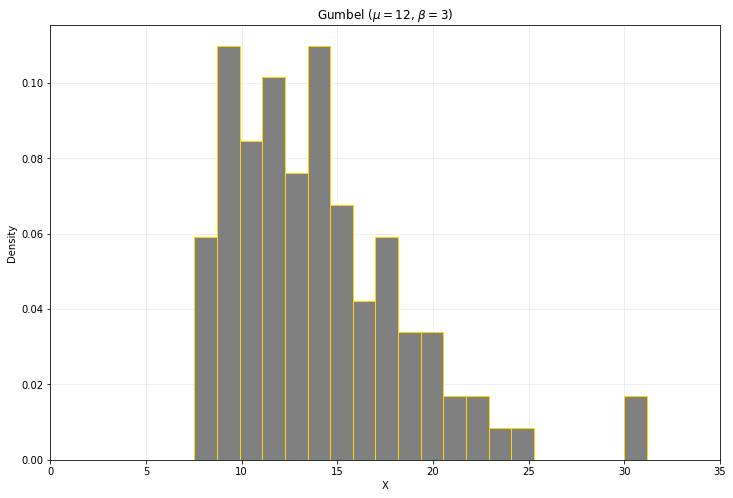

In [15]:
mu = 12
beta = 3
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.hist(x, color="grey", edgecolor="gold", bins=20, density=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title(r'Gumbel ($\mu=${}, $\beta=${})'.format(mu,beta))
plt.xlim([0,35])
plt.show()

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=12$ and $\beta=3$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 99% confidence interval for the mean.

In [16]:
# gamma placeholder
gamma = np.euler_gamma
print(gamma)

# analytical mean
analytical_mean = mu + (gamma * beta)
print(analytical_mean)

# pi placeholder
pi = np.pi
print(pi)

# analytical standard deviation
analytical_std = (beta * pi) / np.sqrt(6)
print(analytical_std)

# analytical variance squaring the standard deviation
analytical_var1 = analytical_std**2
print(analytical_var1)

# analytical variance using the equation I derived below in my markdown
analytical_var2 = (((beta)*(pi))**2) / 6
print(analytical_var2)

#empircal mean from our data in part A
empirical_mean = np.mean(x)
print(empirical_mean)

# making sure the lower and upper bounds match
def get_z_crit(conf_level):
    return stats.norm.ppf(1-((1-conf_level)/2))

z_crit = get_z_crit(0.99)
print(z_crit)

0.5772156649015329
13.7316469947046
3.141592653589793
3.8476494904855927
14.80440660163404
14.804406601634037
13.988876137090426
2.5758293035489004


---
*Note:*  I used the python cell above to check my work down here, I realized after the fact that this cell should have been above the python cell yet I always just referred to the python cell as *above*. So I did much of this work first and double checked myself using python...

---

After looking it up, the mean for the Gumbel distribution with the parameters $\mu = 12$ and $\beta = 3$ is given by:

$E(X) = \mu + \gamma \beta$

where $\gamma$ is the Euler-Mascheroni constant and $\gamma \approx 0.5772$.

The standard deviation for the Gumbel distribution with the parameters $\mu = 12$ and $\beta = 3$ is given by:

$\sigma = \frac{\beta \pi}{\sqrt{6}}$

This would mean that the variance is given by:

$\sigma^2 = \left(\frac{\beta \pi}{\sqrt{6}}\right)^2 = \frac{1}{6}(\beta \pi)^2$

In the context of our problem, our analytical mean is:

$E(X) = 12 + (0.5772156649015329)\cdot(3) = 13.7316469947046$

And the standard deviation is:

$\sigma = \frac{3 \pi}{\sqrt{6}} = 3.8476494904855927$

Which means the variance is:

$\sigma^2 = \left(\frac{3 \pi}{\sqrt{6}}\right)^2 = \frac{1}{6}(3 \pi)^2 = 14.804406601634037$

I used the `sum()` method and divided by `len()` to calculate the empirical mean of the data to be: $13.988876137090426$. Now we just need to find the margin of error and add/subtract it from the sample mean to get our interval. The margin of error is given by the following expression:

margin of error = $z^* \left( \sqrt{\frac{\sigma^2}{n}}\right) = z^* \left( \frac{\sigma}{\sqrt{n}}\right)$

Finally, I used the stats package `norm.ppf()` method which is like using an extremely accurate z-table. Because we are using a 99% CI, we want 0.5% on either side of the interval. To find the lower bound, we use the z-score of $0.005$, and to find the upper bound we use the z-score of $0.995$. Also, because the population variance is known, and because we have a sufficiently large sample of $n=100$, we can in fact use the normal Gaussian distribution which corresponds to a z-critical value.

And now, we can solve for margin of error because we have all of the variables.

$\sigma = 3.8476494904855927$

$\sigma^2 = 14.804406601634037$

$n = 100$

$z^* = \pm 2.5758293035489004$

margin of error $= 2.5758293035489004 \left( \sqrt{\frac{14.804406601634037}{100}} \right) = 2.5758293035489004 \frac{3.8476494904855927}{10} = 0.9910888307$

So now we can solve for the confidence interval: 

$\bar{x} \pm 0.9910888307$

Our empirical mean with the above cells run is found to be: $13.988876137090426$.

So our confidence interval becomes: 

$13.988876137090426 \pm 0.9910888307$

Which means the final interval is:

$[12.9977873064, 14.9799649678] \approx \boxed{[12.9978, 14.9800]}$

Finally, we can see that with a random sample of the Gumbel distribution, taking a 99% confidence interval, our interval did in fact capture the analytical mean.

---

**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 99% confidence interval of $[12.73,  14.72]$ for the mean of the $Gum(\mu=12, \beta=3)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 99% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=12, \beta=3)$ distribution, you could say there is a 99% chance that its true mean falls between 12.73 and 14.72.

**(ii)** If a class of 100 students all construct 99% confidence intervals for the mean of the $Gum(\mu=12, \beta=3)$ distribution, then we expect about 99 of their CIs to contain the true mean, and about 1 of them to miss the true mean.

**(iii)** There is a 99% probability that any given random variable sampled from $Gum(\mu=12, \beta=3)$ will be between 12.73 and 14.72.

---
- **(i)** This situation is true, but without taking multiple CI's it's impossible to know whether or not we got one of the flukey intervals. Generally though, yes, this is the definition of a confidence interval.
- **(ii)** Well assuming each student's cell runs without an issue, then this situation would be true. The size of the interval wouldn't change from student to student. Although each student's mean would be different, our interval size would be the same, and around 99% of students intervals will contain the true population parameter. From the definition of a confidence interval, upon repeated sampling from a population, a confidence interval will contain the true parameter of interest the confidence level percent of times.
- **(iii)** Confidence intervals are *not* used to predict sample statistics, they *are* used to estimate population parameters. Had we changed `n_sample = 100` to `n_sample = 1`, this situation would be reflected and its pretty obvious that we very likely could get a value in the interval, but the probability of this is not equal to the 99% from the confidence interval...

---

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=12$ and $\beta=3$.  For each random sample, compute the 75% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

True mean = 13.7316469947046
With 500 sample means taken with 100 random variables from the Gumbel Distribution,
We had a proportion of 0.754 intervals containing the true mean using a 0.75 confidence interval

Here is a random sample of 50 of these intervals:


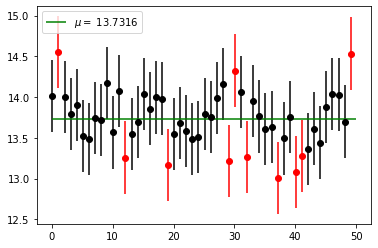

In [17]:
def is_within(x, lb, ub):
    return (x <= ub) and (x >= lb)

def confidence_intervals(m=500, n=100):
    # vars for Gumbel Distribution
    pi = np.pi
    mu = 12
    beta = 3
    gamma = np.euler_gamma
    
    analytical_std = (beta * pi) / np.sqrt(6)
    
    # confidence level stuff
    confidence_level = 0.75
    z_star = stats.norm.ppf(1-((1-confidence_level)/2))

    margin_of_error = z_star * (analytical_std / np.sqrt(n))

    # list that holds the means
    means = list()

    # list that holds the intervals
    intervals = list()
    
    # true mean of the Gumbel with beta and mu
    true_mean = mu + (gamma * beta)
    
    num_success = 0
    
    for i in range(m):
        x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n)
        
        sample_mean = x.mean()
        
        means.append(sample_mean)
        
        interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
        
        intervals.append(interval)
        
        if is_within(true_mean, interval[0], interval[1]):
            num_success += 1
       
    combined = list(zip(means, intervals))
    
    num_intervals = 50
    
    special_means = list()
    special_intervals = list()
    
    indices = np.random.choice(range(len(combined)), num_intervals, replace=False)
    counter = 0.1
    for i in indices:
        mean = combined[i][0]
        lb = combined[i][1][0]
        ub = combined[i][1][1]
        if is_within(true_mean, lb, ub):
            plt.errorbar(x=counter, 
                 y=mean, 
                 yerr=(ub-lb)/2,
                 fmt='o',
                 color='black')
        else:
             plt.errorbar(x=counter, 
                 y=mean, 
                 yerr=(ub-lb)/2,
                 fmt='o',
                 color='red')
        counter += 1
   
    # for plotting the true mean of the dist     
    plt.hlines(xmin=0, xmax=num_intervals,
           y=true_mean, 
           linewidth=1.5,
           color="green",
        label=r'$\mu =$ {0:.4f}'.format(true_mean))
    
    plt.legend(loc='upper left')
    
    print("True mean = {}\nWith {} sample means taken with {} random variables from the Gumbel Distribution,\nWe had a proportion of {} intervals containing the true mean using a {} confidence interval".format(true_mean, m, n, (num_success/m), confidence_level))
    print()
    print("Here is a random sample of {} of these intervals:".format(num_intervals))

confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

---
Yes this proportion does match the theory discussed in class. Upon repeated sampling from the same distribution, a confidence interval used on each sample mean will contain the true mean roughly the same proportion as the level of confidence. In this case we took 500 samples of the Gumbel Distribution and found the means, we were able to add and subtract the margin of error and in roughly 75% of these intervals the true mean is found which is what we expect in a 75% confidence interval.

---

---

<a id='p4'></a>
[Back to top](#top)

### [15 points] Problem 4 - Freethrow Throwbacks
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>Your Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russel fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

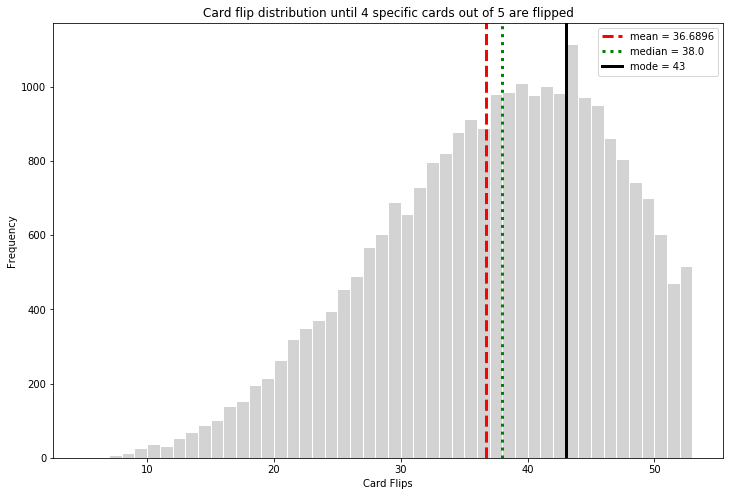

In [20]:
import random

# ripped from my own practicum 1 submission, question #3: Poker

# All code inspired by a Medium article on dealing with cards and decks in an Object Oriented way.
# I was particularly interested in printing the cards and decks nicely as well.
# Lastly, I wanted to investigate the Fisher-Yates algo for shuffling (mentioned in the first article)
# I used the pseudocode from Wikipedia to code my own style of Fisher-Yates
# All online help is posted below:
import random

class Card:
    # initialize a card with its value and suit
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit

    # for printing purposes
    def __str__(self):
        return "{} of {}".format(self.value, self.suit)
    
    # for printing purposes
    def __repr__(self):
        return "{} of {}".format(self.value, self.suit)
        
    def __eq__(self, other):
        if self.suit == other.suit:
            if self.value == other.value:
                return True
        return False

    def get_value(self):
        return self.value

class Deck:
    # initialize empty list and build the deck
    def __init__(self):
        self.cards = list()
        self.build()
        self.size = len(self.cards)
    
    # method that builds a standard 52 card deck, adding two Jokers
    def build(self):
        # suits
        joker = Card('Joker', 'Joker')
        self.cards.append(joker)
        self.cards.append(joker)
        for suit in ['Diamonds', 'Hearts', 'Spades', 'Clubs']:
            # values
            for value in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']:
                self.cards.append(Card(value, suit))
    
    # for printing purposes
    def __str__(self):
        return str(self.cards)	
    
    # for printing purposes
    def __repr__(self):
        return str(self.cards)
                
    # method that shuffles our deck randomly (using	random)
    # algo: Fisher Yates
    def shuffle(self):
        for i in range(self.size - 1, 0, -1):
            x = random.randint(0, i)
            self.cards[i], self.cards[x] = self.cards[x], self.cards[i]
    
    # takes one card out of the deck and returns it
    def draw_card(self):
        return self.cards.pop()

def card_is_in(card):
    special_cards = [Card('6', 'Hearts'), Card('8', 'Diamonds'),  Card('King', 'Clubs'), Card('Joker', 'Joker'), Card('Joker', 'Joker')]
    for each in special_cards:
        if each == card:
            return True
    return False


def draw_until():
    deck = Deck()
    deck.shuffle()
    cards = list()
    counter = 0
    while counter < 4:
        card = deck.draw_card()
        if card_is_in(card):
            counter += 1
        cards.append(card)
    return len(cards)

outcomes = list()
for i in range(25000):
    outcome = draw_until()
    outcomes.append(outcome)

outcomes = np.array(outcomes)    
mean = np.mean(outcomes)
median = np.median(outcomes)
mode = stats.mode(outcomes, axis=None)

num_bins = max(outcomes) - min(outcomes)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.hist(outcomes, color="lightgrey",edgecolor="white", bins=num_bins)
plt.axvline(mean, lw=3, color="red", ls="dashed", label="mean = {}".format(mean))
plt.axvline(median, lw=3, color="green", ls="dotted", label="median = {}".format(median))
plt.axvline(mode[0][0], lw=3, color="black", label="mode = {}".format(mode[0][0]))

ax.set_title('Card flip distribution until 4 specific cards out of 5 are flipped')
ax.set_xlabel('Card Flips')
ax.set_ylabel('Frequency')

_ = plt.legend()

---
So in terms of distribution skew, the data looks skewed to the left. This means more of our data lies on the right hand side of the plot. In the context of this problem, this means it usually takes more than 26 cards drawn to have a successful event.

The mean always hovers right around $36.6$, the median always hovers right around $38$, and the mode changes a little more but stays within $34-48$. Again, in the context of this problem, on average, we'd see around 37 flips before a success. We'd see $50\%$ of data points above and below around $38$ flips. And lastly, the mode changes but we're most likely to see the number of card flips equal to this mode.

The shape of the histogram indicates that the event were looking for is unlikely in a smaller amount of card flips.

---

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

---
In general, when we take a 95% confidence interval from a sample of data, our population parameter in question lies in our  interval 95% of the time. On the flip side, when we take a confidence interval of 99%, our parameter in question lies in our interval 99% of the time. For example, lets say we observe temperature and we get an observed mean and standard deviation. A test with a confidence level of 99% would have to be a larger interval because we would need larger values for $z^*$, in other words, we'd need larger z-scores times standard deviations of temperature values to make sure the interval contains our value 99% of the time. Again, with a confidence level of 95%, we don't need quite as large z-scores therefore a smaller/more narrow interval.

---

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by differant "statistical measures". Compute a 95% confidence interval for the _variance_.


In [21]:
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])

num_data_points = len(smith)

s_mean = sum(smith) / num_data_points

s_var = sum((x-s_mean)**2 for x in smith) / (len(smith)-1)

degrees_of_freedom = num_data_points - 1

t_crit2 = stats.chi2.ppf(0.975, degrees_of_freedom)
t_crit1 = stats.chi2.ppf(0.025, degrees_of_freedom)

z_crit = get_z_crit(0.95)

print(s_var)

print(degrees_of_freedom)

print("t1 = {}".format(t_crit1))
print("t2 = {}".format(t_crit2))

print("z = {}".format(z_crit))

0.04072654894545455
10
t1 = 3.2469727802368413
t2 = 20.483177350807388
z = 1.959963984540054


---
So for starters, we have to compute the sample variance of the given Will Smith data because his whole career variance is unknown. I used the `np.var()` function to do this for me. Becasue the variance won't be normally distributed (because it is unknown) we'll need to use a t-distribution. In our case, I'll use a $\chi^2$(chi-square) distribution, which we'll need to find the degrees of freedom for. The degrees of freedom can be found by the number of data points minus 1 so I used the `len()` function and subtracted 1 to get it in code. Finally, because we are finding a confidence interval with 95% confidence, we need 2.5% in each tail. We must consult the chi-square distribution to figure out our $t^*$ variable in the margin of error calculation. 

Because our sample variance was found to be $0.0407$, and degrees of freedom to be $10$, the confidence interval for variance is found by:

$P(\chi_{1-\alpha/2}^{2} \leq \frac{(n-1)s^2}{\sigma^2} \leq \chi_{\alpha/2}^{2})=1-\alpha$

$P(\frac{\chi_{1-\alpha/2}^{2}}{(n-1)s^2} \leq \frac{1}{\sigma^2} \leq \frac{\chi_{\alpha/2}^{2}}{(n-1)s^2})=1-\alpha$

$P(\frac{(n-1)s^2}{\chi_{1-\alpha/2}^{2}} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi_{\alpha/2}^{2}})=1-\alpha$

And now I'll list all of the variable we have thus far:

$s^2 = 0.0407$

degrees of freedom $ = 11-1 = 10$

$\chi_{1-\alpha/2} = 3.2470$

$\chi_{\alpha/2} = 20.4832$

So our confidence interval for variance is given by:

$[\frac{0.407}{3.2470}, \frac{0.407}{20.4832}]$

$[\frac{0.407}{3.2470}, \frac{0.407}{20.4832}]$

$[0.0199, 0.1253]$

---


***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and you take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


---
Well our alternative hypothesis $H_1$ is: The strength of the carbon fiber is below tolerance, thus *unsafe*. We could say that our null hypothesis $H_0$ is: The strength of the carbon fiber is above or at a tolerant level, thus *safe*. 

I'll define both of the types of errors generally here:
- **Type I.** Occurs when the null hypothesis ($H_0$) is false, but we fail to reject the null and accept it. Also called a false negative
- **Type II.** Occurs when the null hypothesis ($H_0$) is actually true, but we reject the null and accept the alternate. Also called a false positive.
    
So, in the context of our problem, a **type I** error occurs when our carbon fiber does *not* meet the tolerance levels and is thus deemed unsafe, however we fail to reject the null hypothesis so we think we do have safe carbon fiber when in fact, we do not. A **type II** error would occur when we have carbon fiber that does meet the tolerance levels and is thus deemed safe to use, however we reject the null hypothesis so we throw it out. In a perfect world, we'd have low error rates for *both* types of errors, but we are forced to choose unfortunately. Obviously the **type II** error impacts the profits of the plane manufacturer, but it is also quite obvious that a **type I** error would impact a lot more than the profits alone, as the plane could crash because of the defective carbon fiber...

So we'd rather have a much lower **type I** error rate.

---


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccor world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalaty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

---
Confidence intervals can complete this task, and for starters I will need to figure out the confidence level. This can be found by subtracting $\alpha$ from 1. This gives us a confidence level of: $1-0.025 = 0.975$. So we will be taking a 97.5% confidence interval for the difference of means. 

We will need to construct our hypothesis' now... For starters, we want to prove that the difference of two means exceeds a certain value, so we will be using a one-tailed test. After this fact is known, it becomes incredbily easy to see these hypothesis' jump out at ya. $H_0 : \mu_{\text{dumbo}} -\mu_{\text{reef}} \leq 7$ which means: $H_1 : \mu_{\text{dumbo}} -\mu_{\text{reef}} > 7$.

As found in problem 1 part E, the interval for the difference in means is expressed by:

$\bar{X} - \bar{Y} \pm z^* \sqrt{\frac{s_X^2}{n_X} + \frac{s_Y^2}{n_Y}}$

Because we have sufficient sample sizes, we will use a z-distribution and for a 97.5% confidence interval, our $z^* = 2.2414$ (Also found below using my nifty z_crit function...)

And so now I will list all of our variables:

$\bar{X} = 63.9$

$\bar{Y} = 47.2$

$s_X^2 = 19.6^2 = 384.16$

$s_Y^2 = 29.2^2 = 852.64$

$\bar{X} - \bar{Y} = 63.9 - 47.2 = 16.7$

$n_X = 65$

$n_Y = 49$

So our interval can be found with:

$16.7 \pm 2.2414 \sqrt{\frac{384.16}{65} + \frac{852.64}{49}}$

$16.7 \pm 2.2414 \sqrt{5.9102 + 17.4008}$

$16.7 \pm 2.2414 \sqrt{23.311}$

$16.7 \pm 2.2414 (4.8281466423)$

$16.7 \pm 10.6895166662$

Our interval:

$[6.01, 27.39]$

And because the value in our hypothesis, $7$mm, is found within our interval, we have significant statistical evidence where we fail to reject our null hypothesis. There is statistical evidence however, that Dumbo octopi have larger suckers than Reef octopi, just **not** that this difference exceeds $7$mm. Also, it should be stated that in many samples of these two species, we would likely see a lot of samples with Dumbo octopi with suckers exceeding the width of the Reef octopi suckers by more than $7$mm, its just in the context of our test, we cannot be 97.5% certain that the difference in means will exceed $7$mm. We can just be certain that in repeated sampling, in roughly 97.5% of these samples, our difference in means of the two species would lie in the interval $[6.01, 27.39]$.

---

In [22]:
z_critical = get_z_crit(0.975)
print("z* = {0:.4f}".format(z_critical))

z* = 2.2414
